## Simulation of analysis by Sims

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
# load the data
pd.set_option('display.max_columns', 20)

df = pd.read_csv("...\\data_sims.csv")
df.head()

,dateid01,dateid,cmp,cmp1,cpi,ff,m1,xr,y
0,1958-01-01,1958-01-31 23:59:59.999,36.43,99.75,14.66,2.72,NaN,1.0,21.56
1,1958-02-01,1958-02-28 23:59:59.999,36.28,100.80,14.67,1.67,NaN,1.0,21.11
2,1958-03-01,1958-03-31 23:59:59.999,36.34,100.58,14.77,1.20,NaN,1.0,20.85
3,1958-04-01,1958-04-30 23:59:59.999,36.52,99.26,14.80,1.26,NaN,1.0,20.51
4,1958-05-01,1958-05-31 23:59:59.999,36.39,100.53,14.80,0.63,NaN,1.0,20.71


In [ ]:
# Transforming the variables
df['ly'] = np.log(df['y'])
df['lxr'] = np.log(df['xr'])
df['lm'] = np.log(df['m1'])
df['lp'] = np.log(df['cpi'])
df['lcp'] = np.log(df['cmp'])

In [ ]:
df.set_index('dateid01', inplace=True)
df = df[['cmp', 'cmp1', 'cpi', 'ff', 'm1', 'xr', 'y', 'ly', 'lxr', 'lm', 'lp', 'lcp']]

,dateid,cmp,cmp1,cpi,ff,m1,xr,y,ly,lxr,lm,lp,lcp,L.ly
dateid01,,,,,,,,,,,,,,
1958-01-01,1958-01-31 23:59:59.999,36.43,99.75,14.66,2.72,NaN,1.0,21.56,3.070840,0.0,NaN,2.685123,3.595393,NaN
1958-02-01,1958-02-28 23:59:59.999,36.28,100.80,14.67,1.67,NaN,1.0,21.11,3.049747,0.0,NaN,2.685805,3.591267,-0.021093
1958-03-01,1958-03-31 23:59:59.999,36.34,100.58,14.77,1.20,NaN,1.0,20.85,3.037354,0.0,NaN,2.692598,3.592919,-0.012393
1958-04-01,1958-04-30 23:59:59.999,36.52,99.26,14.80,1.26,NaN,1.0,20.51,3.020913,0.0,NaN,2.694627,3.597860,-0.016441
1958-05-01,1958-05-31 23:59:59.999,36.39,100.53,14.80,0.63,NaN,1.0,20.71,3.030617,0.0,NaN,2.694627,3.594294,0.009704


In [66]:
# make a VAR model

data = df[(df.index > '1958-12-01') & (df.index < '1991-03-01')]
model = VAR(data[['ff', 'lm', 'lp', 'ly']])
results = model.fit(maxlags=14, trend='c')

c:\Users\u.nurmatov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


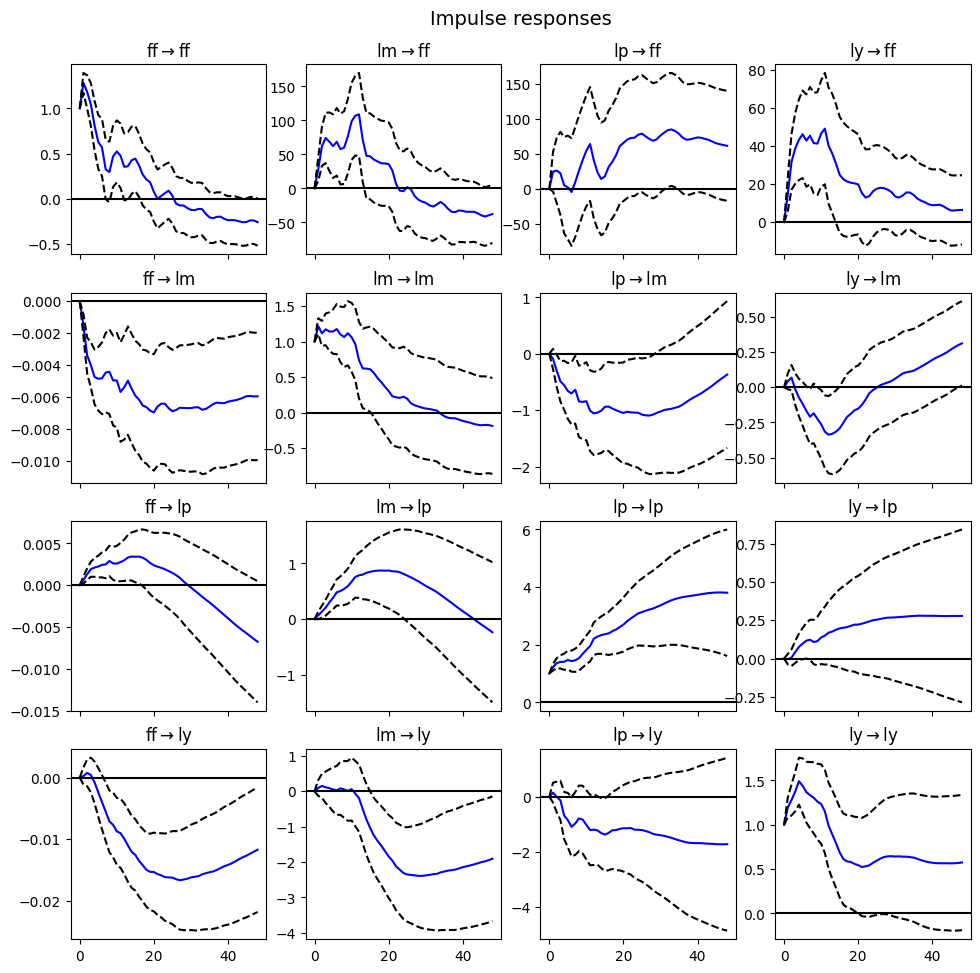

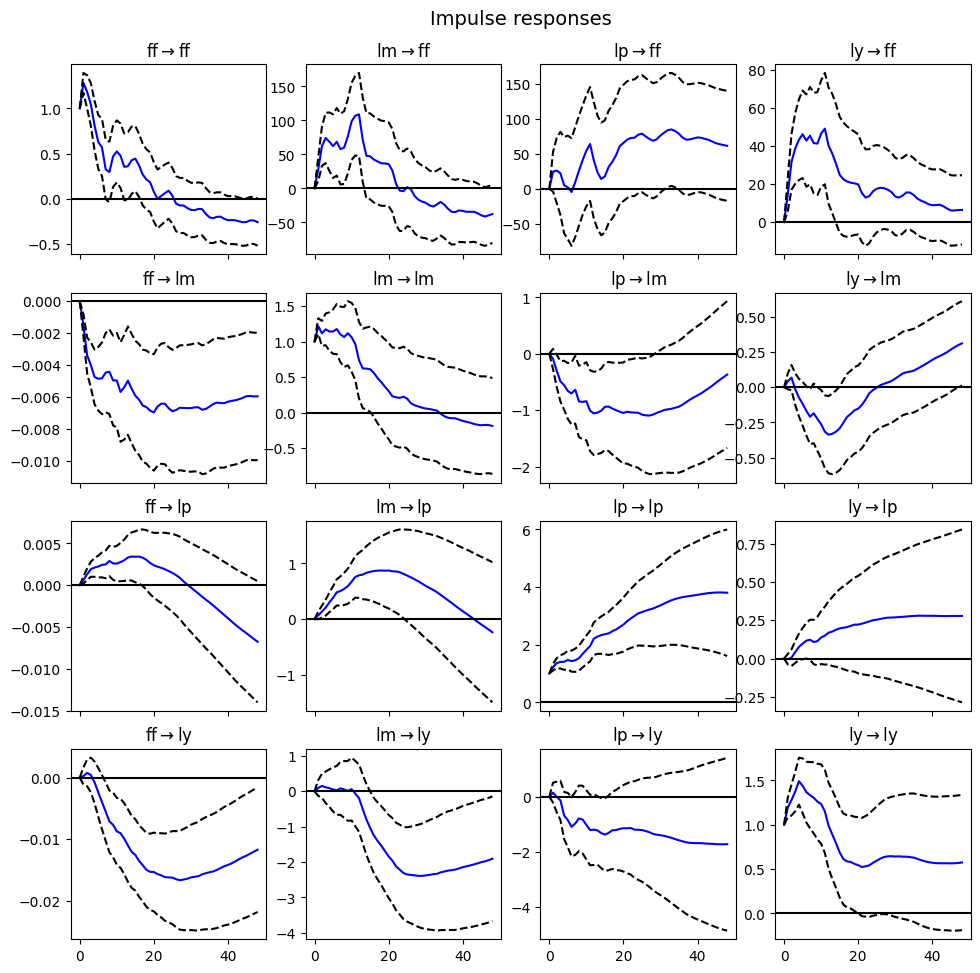

In [67]:
irf = results.irf(48)
irf.plot(orth=False)

In [33]:
model = VAR(data[['ff', 'lxr', 'lcp', 'lm', 'lp', 'ly']])
results = model.fit(maxlags=14, trend='c')

c:\Users\u.nurmatov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


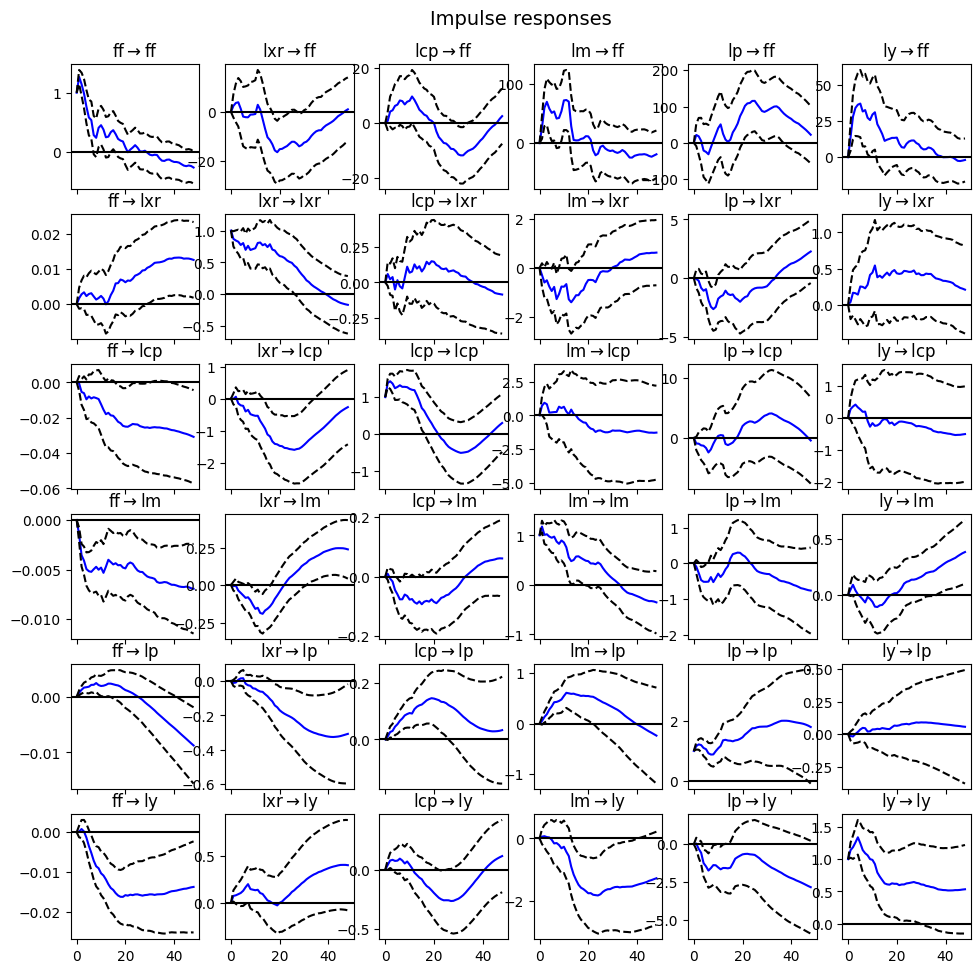

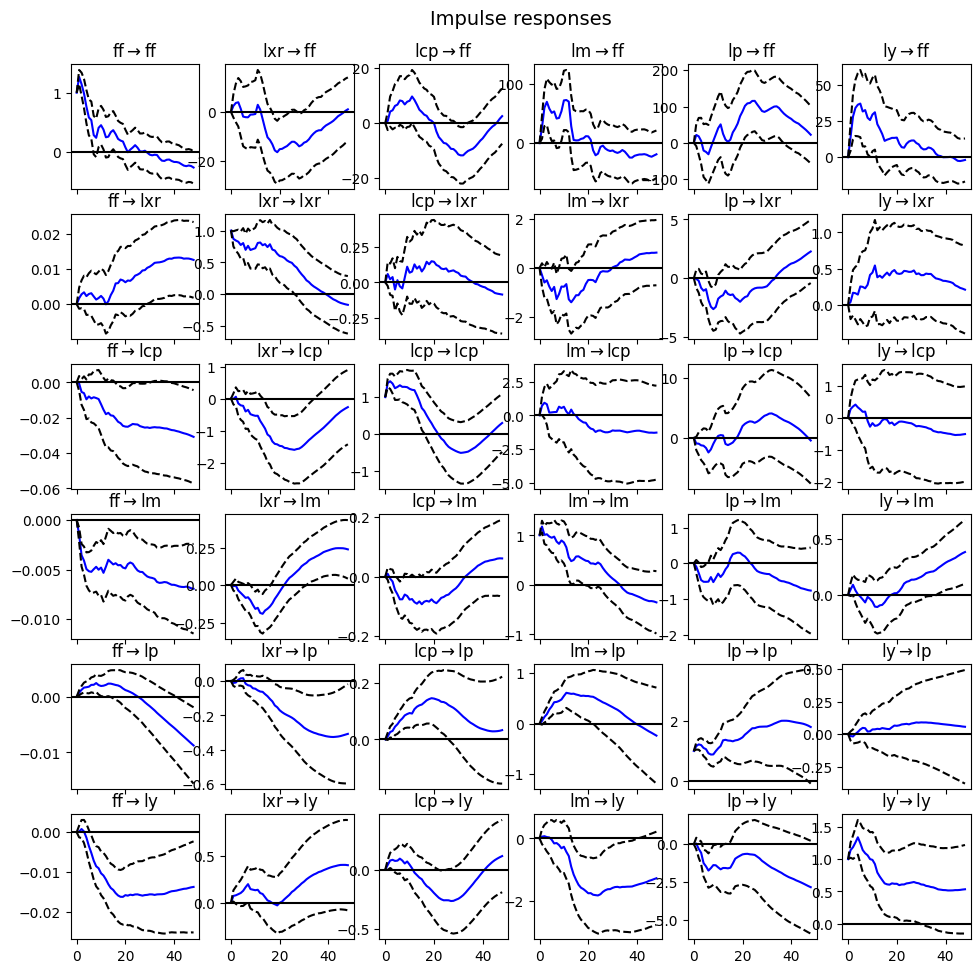

In [34]:
irf = results.irf(48)
irf.plot(orth=False)

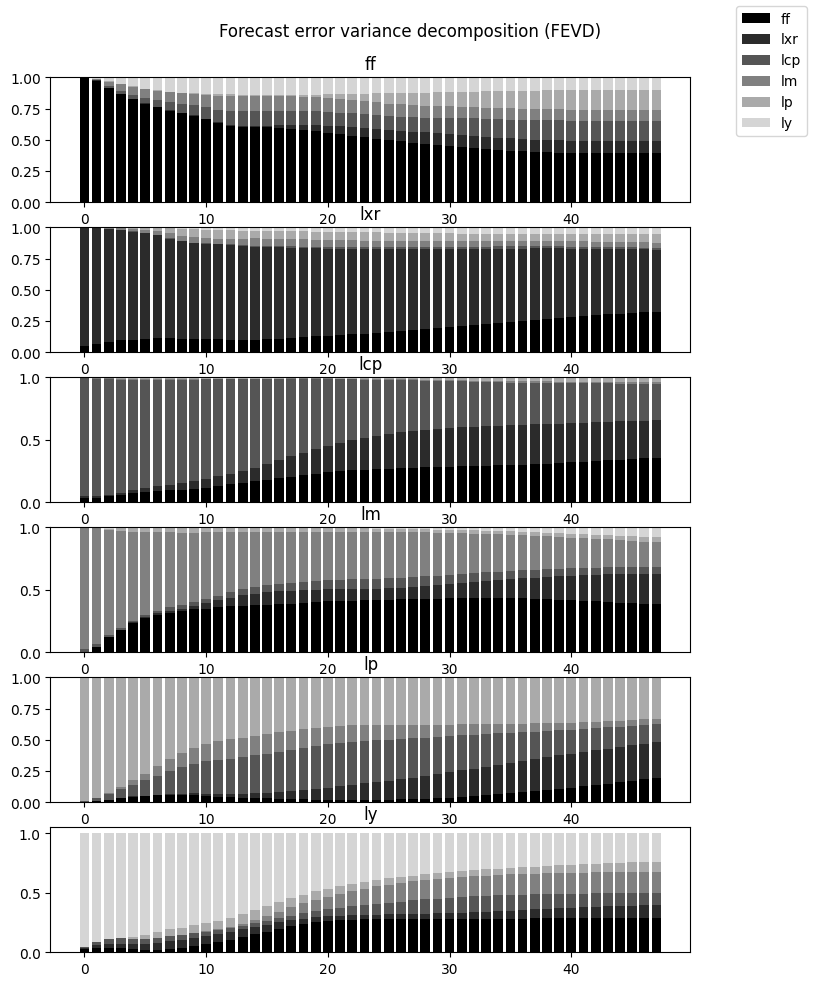

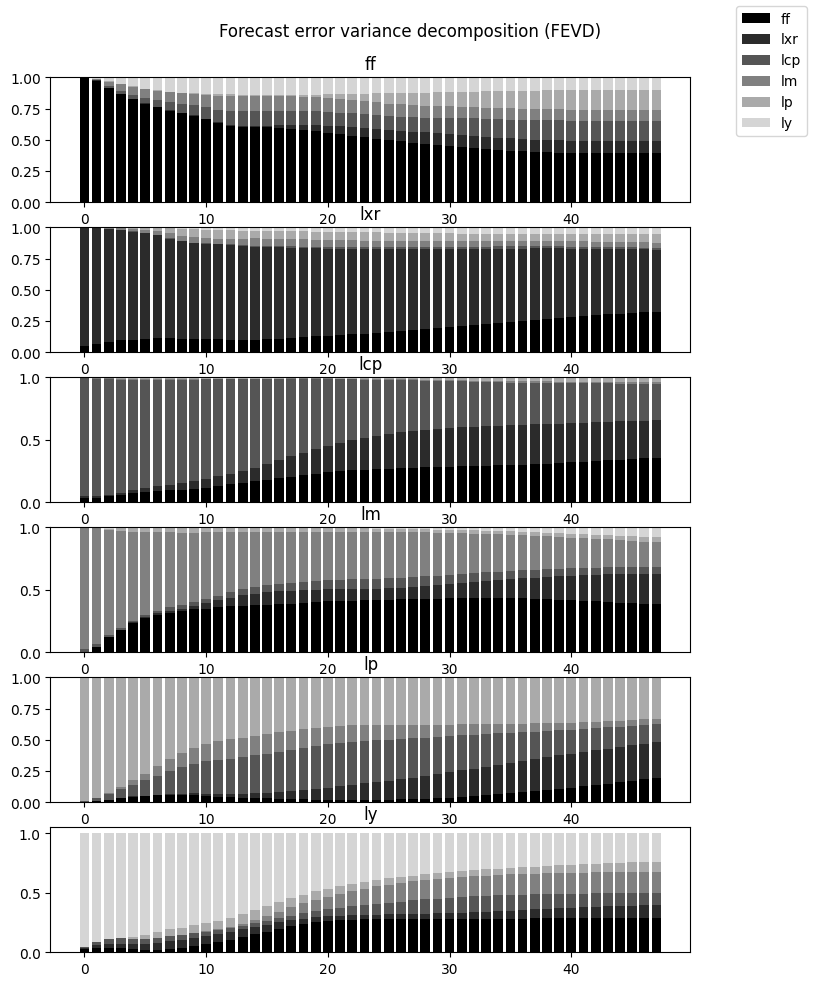

In [62]:
results.fevd(48).plot(figsize=(8, 10))